Example 5.9.9
=========
An Overhung Rotor. Consider the overhung rotor shown in Figure 5.44. The shaft is 1.5m-long and the diameter is 50 mm with a disk of diameter 350mm and thickness 70 mm. The two bearings, with positions given in
Figure 5.44, have a stiffness of 10 MN/m in each direction. The shaft and disk
are made of steel, with material properties E = 211 GN/m², G = 81.2 GN/m²,and p = 7,810 kg/m3. Damping is neglected. Estimate the first six natural frequencies and mode shapes between 0 and 4,000 rev/min.

In [1]:
import ross as rs
import numpy as np
from bokeh.io import output_notebook
output_notebook()

Loading BokehJS ...

(Figure(id='1003', ...),
 <matplotlib.axes._subplots.AxesSubplot at 0x7fd9323784e0>)

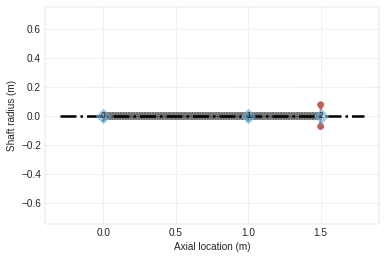

In [4]:
shaft_elements =[]
disk_elements = []
bearing_seal_elements = []
Steel = rs.steel

bearing_seal_elements.append(rs.BearingElement(n=0,kxx=10e6,kyy=10e6,cxx=0,cyy=0))
bearing_seal_elements.append(rs.BearingElement(n=1,kxx=10e6,kyy=10e6,cxx=0,cyy=0))

shaft_elements.append(rs.ShaftElement(material=Steel, n=0,L=1,o_d=0.05,i_d=0))
shaft_elements.append(rs.ShaftElement(material=Steel, n=1,L=.5,o_d=0.05,i_d=0))

disk_elements.append(rs.DiskElement.from_geometry(n=2,i_d=0.05,o_d=0.35,width=0.07,material=Steel))

#Moment approach
overhung_rotor = rs.Rotor(shaft_elements=shaft_elements,
                          bearing_seal_elements=bearing_seal_elements,
                          disk_elements=disk_elements)
#from section approach
leng_data = [1.0,0.5]

overhung_from_section_rotor = rs.Rotor.from_section(brg_seal_data=bearing_seal_elements,
                                                    disk_data=disk_elements,
                                                    leng_data=leng_data,
                                                    i_ds_data= [0,0] ,
                                                    o_ds_data= [0.05,0.05]                                                 
                                                   )
overhung_from_section_rotor.plot_rotor()

In [6]:

print('From section approach =',overhung_from_section_rotor.wn/(2*np.pi))

From section approach = [ 14.34690401  14.34690401 109.31683437 109.31683437 134.05186826
 134.05186826]


(<Figure size 432x288 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fd931383780>)

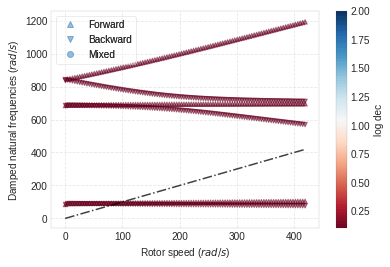

In [13]:
overhung_from_section_rotor.run_campbell(np.linspace(0,4000*np.pi/30,100)).plot()